이 노트북은 최건호, 파이토치 첫걸음 , 한빛미디어 ,2019 를 참고하였습니다. 

## 1. 모듈 불러오기

In [25]:
import torch 
import torch.nn as nn #많은 neural network이 담겨있는 모듈입니다. 
import torch.optim as optim  # 많은 optimizer가 담겨있는 모듈입니다. 
import torch.nn.init as init # neural network를 초기화 하는 모듈을 담고 있습니다. 
from torch.utils.data import DataLoader # DataLoader는 데이터를 batch_size만큼 불러오는 역할 등을 수행합니다. 

import torchvision 
import torchvision.datasets as dset # 사진 등의 vision 데이터가 담겨있는 모듈입니다. 
import torchvision.transforms as transforms #이 모듈에는 데이터를 자르고, 반전시키고 tensor로 변환해주기 등의 데이터 변환 함수가 담겨있습니다.  드
import numpy as np

import matplotlib.pyplot as plt

print(torch.__version__)


1.9.0+cu102


## 2. 데이터 다운 

In [26]:
#모듈을 통해 torchvision에서 제공하는 데이터를 쉽게 다운받을 수 있습니다. 
#root는 불러들인 데이터가 저장되는 곳, train은 학습데이터인지에 대한 여부, transform은 데이터 변환함수를 넣는 인자, 
#target_transform은 label(정답)데이터 또한 변환할 것인지에 대한 여부 
#download는 지정된 경로에 데이터가 없다면 다운받을 것인지에 대한 여부를 묻습니다. 
mnist_train=dset.MNIST(root='../',train=True, transform=transforms.ToTensor(),target_transform=None,download=True)
mnist_test=dset.MNIST(root='../',train=False,transform=transforms.ToTensor(),target_transform=None,download=True)


In [27]:

#데이터 셋 체크 getitem을 써도 되고, 인덱싱을 통해서 해도 괜찮습니다. 
#데이터 하나가 가진 크기를 유심히 봐야합니다. 
print(mnist_train.__getitem__(0)[0].size(), mnist_train.__len__())
print(mnist_test.__getitem__(0)[0].size(), mnist_test.__len__())

print(len(mnist_train),len(mnist_test))
#print(mnist_train[0])


torch.Size([1, 28, 28]) 60000
torch.Size([1, 28, 28]) 10000
60000 10000


## 3. 하이퍼 파라미터 

In [28]:
#CNN에서 대표적인 하이퍼 파라미터로는  num_epoch, batch_size, learnin_rate가 있습니다. 이는 모델에 따라 가감될 수 있습니다. 
num_epoch=10
batch_size=256
learning_rate= 0.0002

## 4. 데이터 로더 정의하기 

- 사용할 데이터
- 배치 사이즈 (batch_size)
- 섞을지 여부 (shuffle)
- 사용할 프로세스 개수 (num_workers)
- 마지막에 남는 데이터의 처리 여부 (drop_last)

In [29]:
#위에서 데이터를 정의했는데 왜 또 데이터를 정의하나요? 라는 의문이 생길 것 같습니다. 
#위에서는 데이터 전부를 정의했습니다. mnist_train에는 모든 학습 데이터가 들어있습니다.
#모든 학습 데이터를 한 번에 학습하면 과부하가 발생할 것입니다. 
#그래서 데이터를 조금씩 조금씩 쪼개서 학습할 필요가 있습니다. 그 역할을 수행하는 것이 DataLodaer이고 때문에 여기서 train_loader,text_loader를 정의하는 것입니다. 
train_loader=DataLoader(dataset=mnist_train,batch_size=batch_size,shuffle=True,num_workers=2,drop_last=True)
test_loader=DataLoader(dataset=mnist_test,batch_size=batch_size,shuffle=False,num_workers=2,drop_last=True)


## 5. 모델 정의하기 

Conv(1,16,5)->ReLu->Conv(16,32,5)->ReLu->MaxPool2d(2,2)->Conv2d(32,64,5)->ReLu->MaxPool2d(2,2)->fc

SyntaxError: ignored

In [33]:
#모델을 정의할 때 유념해야할 건 각 층의 결과물의 사이즈입니다. 
#이 층에서 어떤 size를 가진 데이터를 몇 개 도출하는지 정확하게 알고 있어야 정확한 모델을 정의할 수 있습니다. 
#모델이 복잡해지면 복잡해질수록 이는 더욱 중요해집니다. 때문에 모델을 정의할 때 옆에 각 모델이 도출하는 데이터의 크기를 써넣는 것을 추천드립니다. 
#해당 모델은 임의로 만든 모델입니다. 이 모델이 다른 모델보다 뛰어나다는 보장이 없습니다. 
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.layer = nn.Sequential(
            nn.Conv2d(in_channels=1,out_channels=16,kernel_size=5),             # [batch_size,1,28,28] -> [batch_size,16,24,24]
            nn.ReLU(),                                                          # 필터의 개수는 1개(흑백이미지)에서 16개로 늘어나도록 임의로 설정했습니다. 
            nn.Conv2d(in_channels=16,out_channels=32,kernel_size=5),            # [batch_size,16,24,24] -> [batch_size,32,20,20]
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2),                               # [batch_size,32,20,20] -> [batch_size,32,10,10]
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5),          # [batch_size,32,10,10] -> [batch_size,64,6,6]
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)                                # [batch_size,64,6,6] -> [batch_size,64,3,3]
        )
        self.fc_layer = nn.Sequential(                                          
            nn.Linear(64*3*3,100),                                              # [batch_size,64*3*3] -> [batch_size,100]
            nn.ReLU(),
            nn.Linear(100,10)                                                   # [batch_size,100] -> [batch_size,10]
        )       
        
    def forward(self,x):
        out = self.layer(x)                                                     # self.layer에 정의한 Sequential의 연산을 차례대로 다 실행합니다.
        out = out.view(batch_size,-1)                                           # view 함수를 이용해 텐서의 형태를 [batch_size,나머지]로 바꿔줍니다. 
                                                                                # ex) 2x3 형태였던 텐서를 .view(1,-1) 해주면 1x6의 형태로 바뀝니다. .view(3,-1)이면 3x2로 바뀜.
                                                                                # 만약 전체 텐서의 크기가 batch_size로 나누어 떨어지지 않으면 오류가 납니다.
        out = self.fc_layer(out)
        return out


# https://pytorch.org/docs/stable/nn.html?highlight=conv2d#torch.nn.Conv2d
# https://pytorch.org/docs/stable/tensors.html?highlight=view#torch.Tensor.view




  

## 6.손실함수와 최적화 함수 정의하기 

In [36]:
#gpu나 cpu를 device로 불러들입니다. 그리고 device에서 학습이 진행되게끔 모델을 device에 올려놓습니다.
#loss function과 optimizer를 정의하는 것도 잊지 마세요! 
#우리는 torch가 제공하는 걸 가져다 쓰면 됩니당 ~ ^_^  
device=torch.device("cuda:0" if torch.cuda.is_available() else 'cpu')  

print(device)

model=CNN().to(device)

loss_func=nn.CrossEntropyLoss()

optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)

cuda:0


In [37]:
from torchsummary import summary
summary(model,(1,28,28),batch_size=256)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [256, 16, 24, 24]             416
              ReLU-2          [256, 16, 24, 24]               0
            Conv2d-3          [256, 32, 20, 20]          12,832
              ReLU-4          [256, 32, 20, 20]               0
         MaxPool2d-5          [256, 32, 10, 10]               0
            Conv2d-6            [256, 64, 6, 6]          51,264
              ReLU-7            [256, 64, 6, 6]               0
         MaxPool2d-8            [256, 64, 3, 3]               0
            Linear-9                 [256, 100]          57,700
             ReLU-10                 [256, 100]               0
           Linear-11                  [256, 10]           1,010
Total params: 123,222
Trainable params: 123,222
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.77
Forward/

## 7.학습하기 

In [38]:
loss_arr=[]
for i in range(num_epoch):
  for j,[image,label] in enumerate(train_loader):  #아래에서 j를 이용해서 loss를 모으기 위해 이렇게 코드를 짰습니다. 
    x=image.to(device)            #학습이미지와 
    y_=label.to(device)           #정답을 device에 올려놓습니다.
    optimizer.zero_grad() 
    output=model.forward(x)       #학습이미지를 모델에 돌린 결과를 가져옵니다. 
    loss=loss_func(output,y_)     #결과와 정답을 loss function에 넣고 loss를 추출합니다. 
    loss.backward()               #추출된 loss를 통해 역전파 ! 
    optimizer.step()              #역전파를 했다면 optimizer.step()를 통해 파라미터를 이동시켜줍시다. 
    
    if j%1000==0:
      print(loss)
      loss_arr.append(loss.cpu().detach().numpy())

        
        
    

tensor(2.3022, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.2096, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1030, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1464, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0819, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1074, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0267, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0570, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0796, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0380, device='cuda:0', grad_fn=<NllLossBackward>)


## 8.손실 시각화 

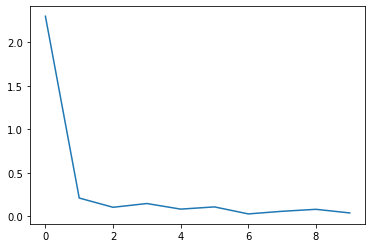

In [39]:
plt.plot(loss_arr)
plt.show()

## 9.테스트 하기 

In [40]:
correct=0
total=0

with torch.no_grad():
  for image,label in test_loader:
    x=image.to(device)
    y_=label.to(device)
    output=model.forward(x)
     #https://pytorch.org/docs/stable/torch.html?highlight=max#torch.max
    _,output_index=torch.max(output,1)  #max함수는 max value와 max value의 index를 도출합니다. 두 번째 인자 1은 결과의 dimension을 의미합니다. 

    total+=label.size(0)

    correct += (output_index==y_).sum().float()

print("Accuracy of Test Data: {}%".format(100*correct/total))


Accuracy of Test Data: 98.73798370361328%


# 추가 섹션! cnn2d의 여러 파라미터를 알아봅시다 

- https://pytorch.org/docs/stable/nn.html?highlight=conv2d#torch.nn.Conv2d
- in_channels: 입력의 채널 수
- out_channels: 출력의 채널 수
- kernel_size: 필터 혹은 커널의 크기 
- stride: 필터 적용의 간격 (stride: 걸음걸이)
- padding: 입력 데이터를 추가적으로 둘러싸는 층의 두께
- padding_mode: 패딩 적용 방식 (ex. zero padding은 0으로 채우는 경우)



데이터는 위에서 불러들인 mnist_test를 그대로 이용합니다. 

In [24]:
print(mnist_train)

# dataset.__getitem__(idx)
image,label = mnist_train.__getitem__(0)
print(image.size(),label)

#위 아래 모두 동일한 결과물을 도출합니다. 

# dataset[idx]
image,label = mnist_train[0]
print(image.size(),label)

# dataset.__len__()
print(mnist_train.__len__())

#위 아래 모두 동일한 결과물을 도출합니다. 

# len(dataset)
len(mnist_train)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../
    Split: Train
    StandardTransform
Transform: ToTensor()
torch.Size([1, 28, 28]) 5
torch.Size([1, 28, 28]) 5
60000


60000

## 데이터 시각화 

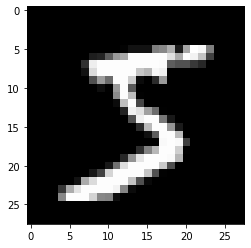

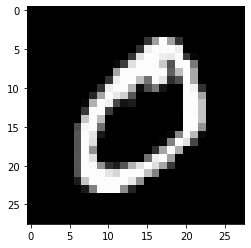

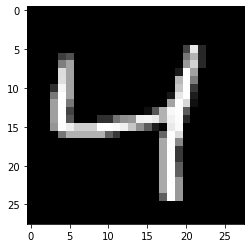

In [25]:
for i in range(3):
    img= mnist_train[i][0].numpy()
    plt.imshow(img[0],cmap='gray')
    plt.show()

- 파이토치 텐서 사이즈는 다음과 같은 형태를 가지고 있습니다 -> [Batch,Channel,Height,Width]


## 1) Channels



torch.Size([1, 3, 28, 28])


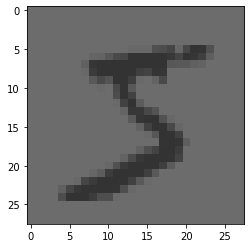

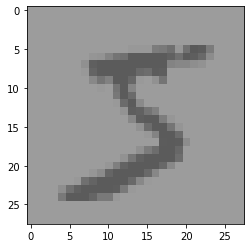

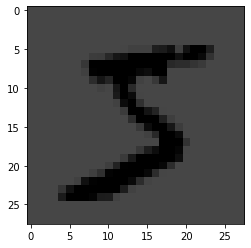

In [26]:
# 먼저 트레이닝 데이터의 첫번째 이미지-라벨 쌍을 불러옵니다.
image,label = mnist_train[0]

# nn.Conv2d 연산을 적용할 수 있도록 이미지 데이터의 형태를 [1,1,28,28]로 만들어줍니다.
# 이 데이터의 경우 데이터 하나가 원래 [1,28,28]의 크기를 가진 흑백데이터입니다.  
# [batch,channel,h,w]의 크기를 가져야 하기 때문에 이렇게 바꾸어줬습니다. 
# 이는 view 말고도 unsqueeze 함수로도 구현할 수 있습니다.
image = image.view(-1,image.size()[0],image.size()[1],image.size()[2])

# 1개의 채널을 입력으로 받아서 3개의 채널이 나오는 컨볼루션 연산을 정의합니다.
conv_layer = nn.Conv2d(in_channels=1,out_channels=3,kernel_size=1)

#3개의 채널이 나온다는 것은 3개의 feature map이 나온다는 것과 동일합니다. 

# 연산에 입력 이미지를 넣습니다.
output = conv_layer(image)

# 결과의 형태를 확인합니다. 
# 연산에서 정의한대로 결과값의 형태는 [1,3,28,28]이 나옵니다. 

print(output.size())

# 출력의 각 채널별 이미지를 띄워봅니다. 
for i in range(output.size()[1]):
    plt.imshow(output[0,i,:,:].data.numpy(),cmap='gray',vmin=-1,vmax=1)
    plt.show()

### 2) Kernel Size


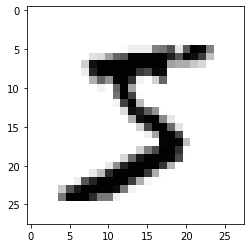

커널 사이즈가 1인 경우 결과값의 크기:torch.Size([1, 1, 28, 28])


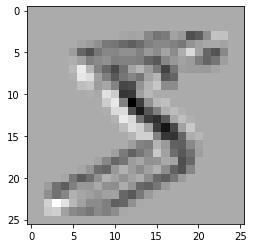

커널 사이즈가 3인 경우 결과값의 크기:torch.Size([1, 1, 26, 26])


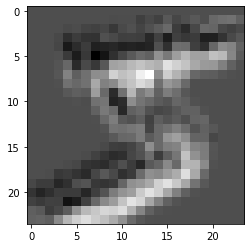

커널 사이즈가 5인 경우 결과값의 크기:torch.Size([1, 1, 24, 24])


In [27]:
# 커널 사이즈를 1로 하는 경우
conv_layer = nn.Conv2d(in_channels=1,out_channels=1,kernel_size=1)
output = conv_layer(image)
plt.imshow(output[0,0,:,:].data.numpy(),cmap='gray')
plt.show()
print("커널 사이즈가 1인 경우 결과값의 크기:{}".format(output.size()))


# 커널 사이즈를 3로 하는 경우
conv_layer = nn.Conv2d(in_channels=1,out_channels=1,kernel_size=3)
output = conv_layer(image)
plt.imshow(output[0,0,:,:].data.numpy(),cmap='gray')
plt.show()
print("커널 사이즈가 3인 경우 결과값의 크기:{}".format(output.size()))


# 커널 사이즈를 5로 하는 경우
conv_layer = nn.Conv2d(in_channels=1,out_channels=1,kernel_size=5)
output = conv_layer(image)
plt.imshow(output[0,0,:,:].data.numpy(),cmap='gray')
plt.show()
print("커널 사이즈가 5인 경우 결과값의 크기:{}".format(output.size()))

## 3) Stride

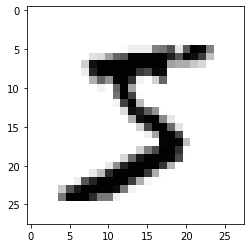

스트라이드가 1인 경우 결과값의 크기:torch.Size([1, 1, 28, 28])


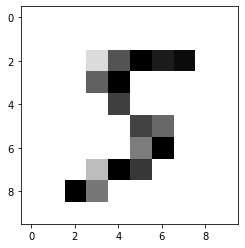

스트라이드가 3인 경우 결과값의 크기:torch.Size([1, 1, 10, 10])


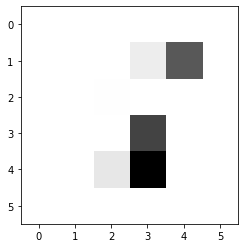

스트라이드가 5인 경우 결과값의 크기:torch.Size([1, 1, 6, 6])


In [28]:
# 스트라이드가 1인 경우
conv_layer = nn.Conv2d(in_channels=1,out_channels=1,kernel_size=1,stride=1)
output = conv_layer(image)
plt.imshow(output[0,0,:,:].data.numpy(),cmap='gray')
plt.show()
print("스트라이드가 1인 경우 결과값의 크기:{}".format(output.size()))


# 스트라이드가 3인 경우
conv_layer = nn.Conv2d(in_channels=1,out_channels=1,kernel_size=1,stride=3)
output = conv_layer(image)
plt.imshow(output[0,0,:,:].data.numpy(),cmap='gray')
plt.show()
print("스트라이드가 3인 경우 결과값의 크기:{}".format(output.size()))


# 스트라이드가 5인 경우
conv_layer = nn.Conv2d(in_channels=1,out_channels=1,kernel_size=1,stride=5)
output = conv_layer(image)
plt.imshow(output[0,0,:,:].data.numpy(),cmap='gray')
plt.show()
print("스트라이드가 5인 경우 결과값의 크기:{}".format(output.size()))

## 4) Padding

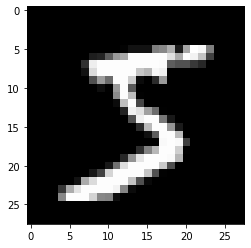

패딩이 0인 경우 결과값의 크기:torch.Size([1, 1, 28, 28])


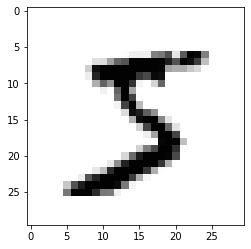

패딩이 1인 경우 결과값의 크기:torch.Size([1, 1, 30, 30])


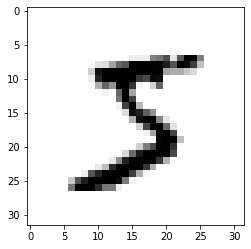

패딩이 2인 경우 결과값의 크기:torch.Size([1, 1, 32, 32])


In [29]:
# 패딩이 없는 경우
conv_layer = nn.Conv2d(in_channels=1,out_channels=1,kernel_size=1,padding=0)
output = conv_layer(image)
plt.imshow(output[0,0,:,:].data.numpy(),cmap='gray')
plt.show()
print("패딩이 0인 경우 결과값의 크기:{}".format(output.size()))

# 패딩이 1인 경우
conv_layer = nn.Conv2d(in_channels=1,out_channels=1,kernel_size=1,padding=1)
output = conv_layer(image)
plt.imshow(output[0,0,:,:].data.numpy(),cmap='gray')
plt.show()
print("패딩이 1인 경우 결과값의 크기:{}".format(output.size()))

# 패딩이 2인 경우
conv_layer = nn.Conv2d(in_channels=1,out_channels=1,kernel_size=1,padding=2)
output = conv_layer(image)
plt.imshow(output[0,0,:,:].data.numpy(),cmap='gray')
plt.show()
print("패딩이 2인 경우 결과값의 크기:{}".format(output.size()))